# Prepare a cropped image of Liverpool

In [1]:
from pathlib import Path
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from functions import crop_scene, load_scene, rgb_composite, save_scene

Load and crop the scene.

In [2]:
region = np.array([4500, 6100, 2200, 3600])
liverpool = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/liverpool_2020/LC08_L2SP_204023_20200927_20201006_02_T1/", 
        pattern="[0-9]*",
    ),
    region,
)
liverpool_pan = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/liverpool_2020/LC08_L1TP_204023_20200927_20201006_02_T1/", 
        pattern="[8]",
    ),
    region * 2,
)

Plot it to make sure it looks good.

In [3]:
truecolor = rgb_composite(liverpool, in_range=(5000, 18000))

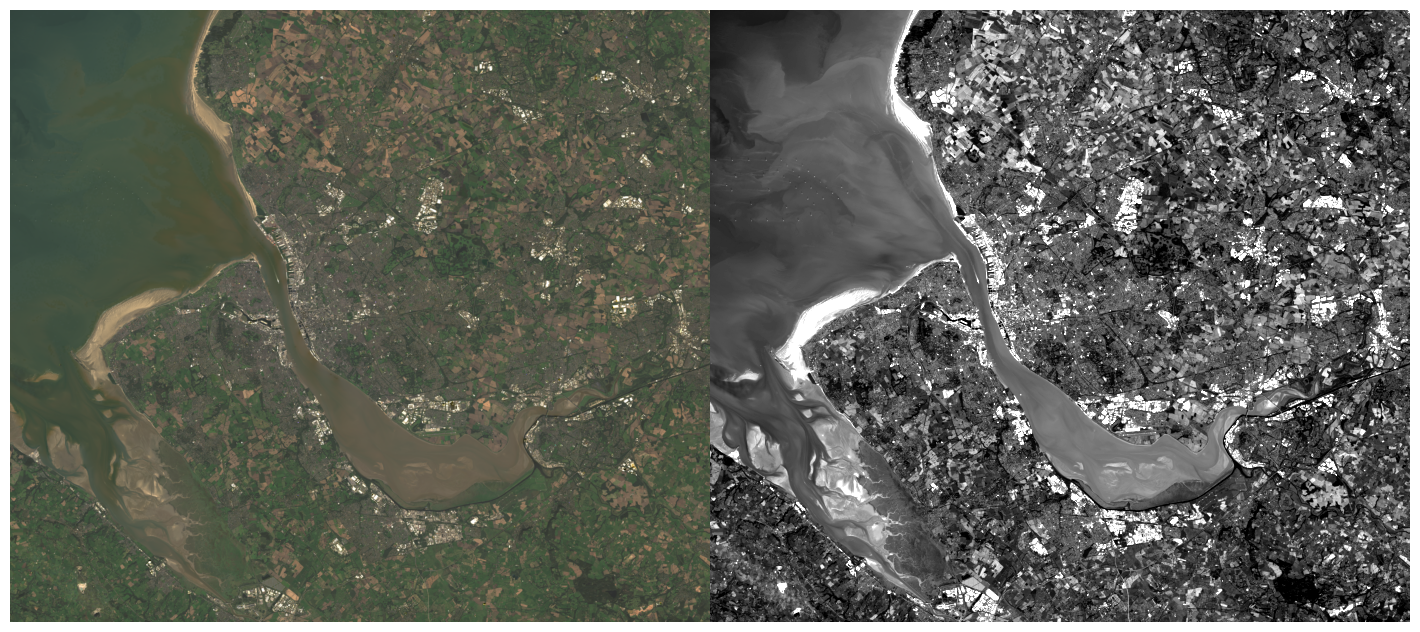

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 9), dpi=100)
axes[0].imshow(truecolor)
vmin, vmax = np.percentile(liverpool_pan[8], (3, 97))
axes[1].imshow(liverpool_pan[8], cmap="gray", vmin=vmin, vmax=vmax)
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)

Save the cropped images to the repository.

In [5]:
data_folder = Path("../data/liverpool/")
scenes = [liverpool, liverpool_pan]
destinations = [
    data_folder / "LC08_L2SP_204023_20200927_20201006_02_T1_cropped",
    data_folder / "LC08_L1TP_204023_20200927_20201006_02_T1_cropped",
]
prefixes = [
    "LC08_L2SP_204023_20200927_20201006_02_T1_",
    "LC08_L1TP_204023_20200927_20201006_02_T1_",
]
for scene, destination, prefix in zip(scenes, destinations, prefixes):
    save_scene(scene, destination, prefix)

/home/leo/edu/remote-sensing/preparation/functions.py:57: UserWarning: ../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B10.TIF is a low contrast image
  skimage.io.imsave(fname, scene[band])


In [6]:
!du -h ../data/liverpool/*/*

18M	../data/liverpool/LC08_L1TP_204023_20200927_20201006_02_T1_cropped/LC08_L1TP_204023_20200927_20201006_02_T1_B8.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B10.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B1.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B2.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B3.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B4.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B5.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_20200927_20201006_02_T1_cropped/LC08_L2SP_204023_20200927_20201006_02_T1_B6.TIF
4.3M	../data/liverpool/LC08_L2SP_204023_